In [21]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# Additional imports
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

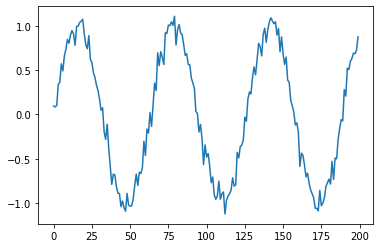

In [23]:
# Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# Plot it
plt.plot(series)

In [24]:
### Build the dataset
# lets see if we cn use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) -T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (190, 10) Y.shape (190,)


In [25]:
# Try the autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 3ms/sample - loss: 1.1810 - val_loss: 0.4958
Epoch 2/80
95/95 [==============================] - 0s 197us/sample - loss: 0.6125 - val_loss: 0.6880
Epoch 3/80
95/95 [==============================] - 0s 202us/sample - loss: 0.4042 - val_loss: 0.3034
Epoch 4/80
95/95 [==============================] - 0s 183us/sample - loss: 0.2333 - val_loss: 0.2137
Epoch 5/80
95/95 [==============================] - 0s 195us/sample - loss: 0.2158 - val_loss: 0.0709
Epoch 6/80
95/95 [==============================] - 0s 203us/sample - loss: 0.0480 - val_loss: 0.0350
Epoch 7/80
95/95 [==============================] - 0s 185us/sample - loss: 0.0696 - val_loss: 0.0665
Epoch 8/80
95/95 [==============================] - 0s 197us/sample - loss: 0.0723 - val_loss: 0.0461
Epoch 9/80
95/95 [==============================] - 0s 222us/sample - loss: 0.0422 - val_loss: 0.0720
Epoch 10/80
95/95 [=====================

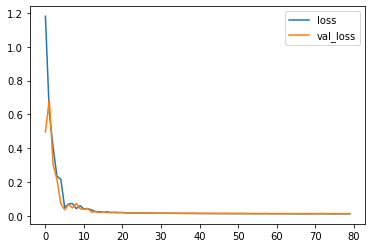

In [26]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

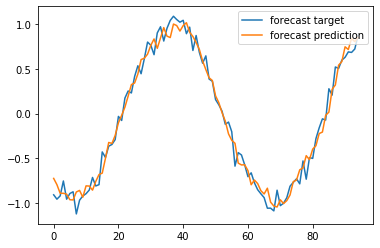

In [27]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] #1x1 array => scalar
  i += 1
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [0]:
# Forecast future values (use only self-predictions for making predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] #!-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array => scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

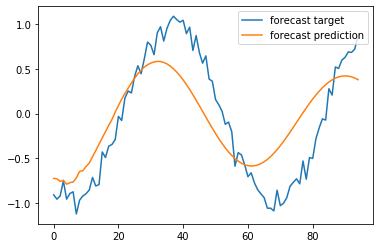

In [29]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()